In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# -------------------------
# 한글 폰트 설정 (Windows)
# -------------------------
plt.rcParams['font.family'] = 'Malgun Gothic'   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스(-) 깨짐 방지


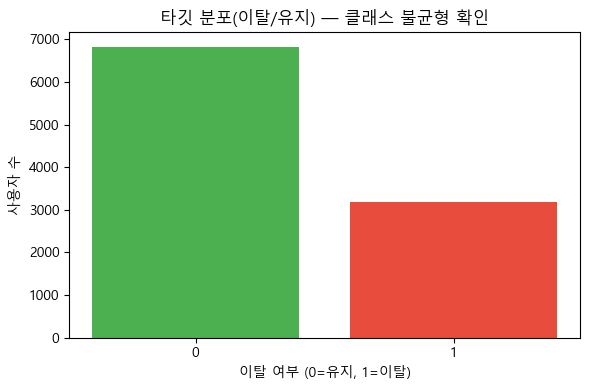

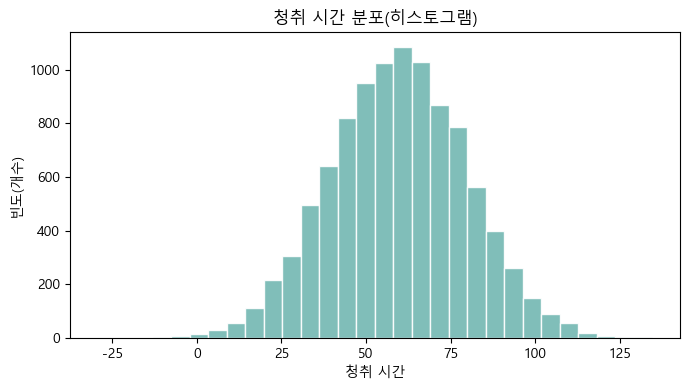

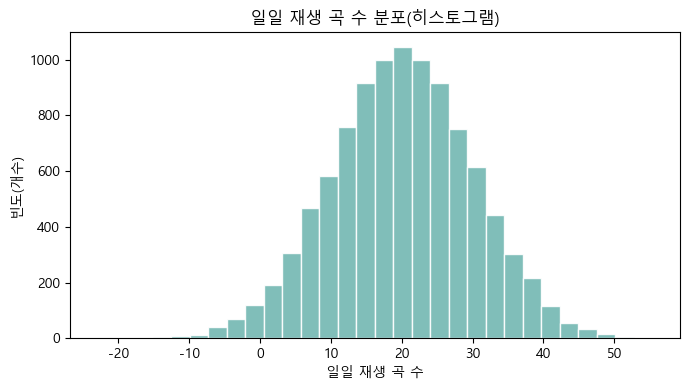

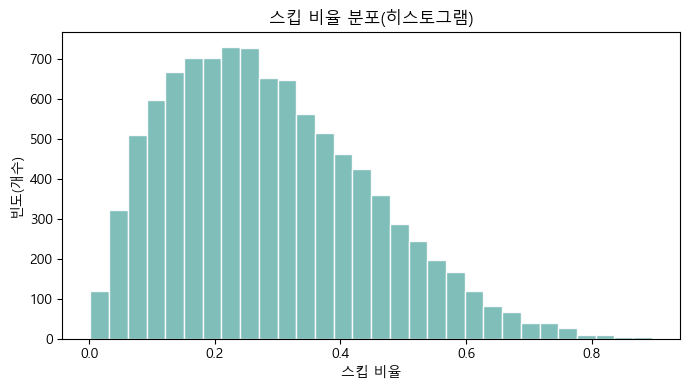

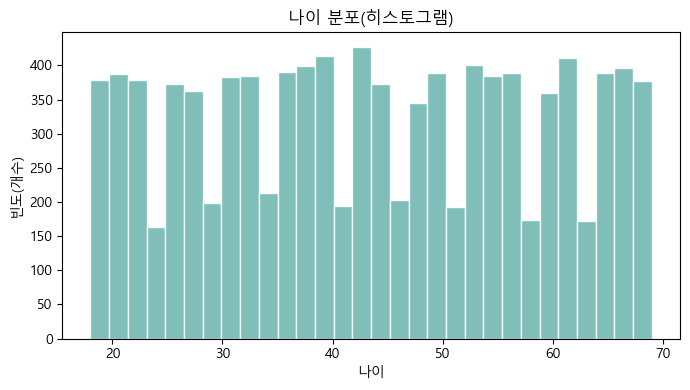

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15400\2985531374.py:109: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([data0, data1], labels=["유지(0)", "이탈(1)"], patch_artist=True)


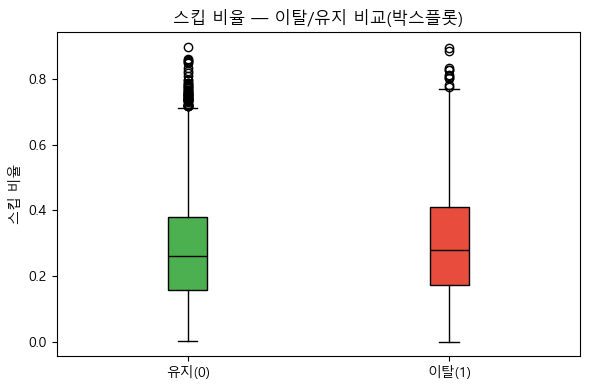

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15400\2985531374.py:109: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([data0, data1], labels=["유지(0)", "이탈(1)"], patch_artist=True)


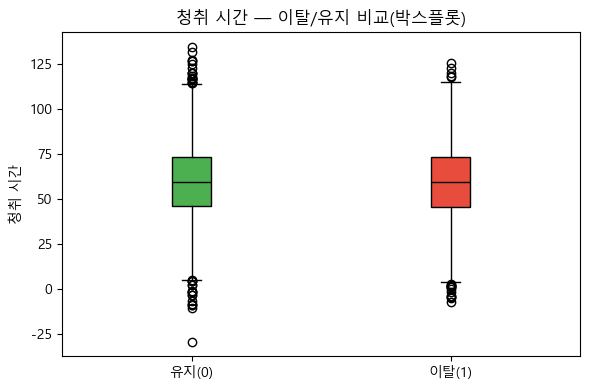

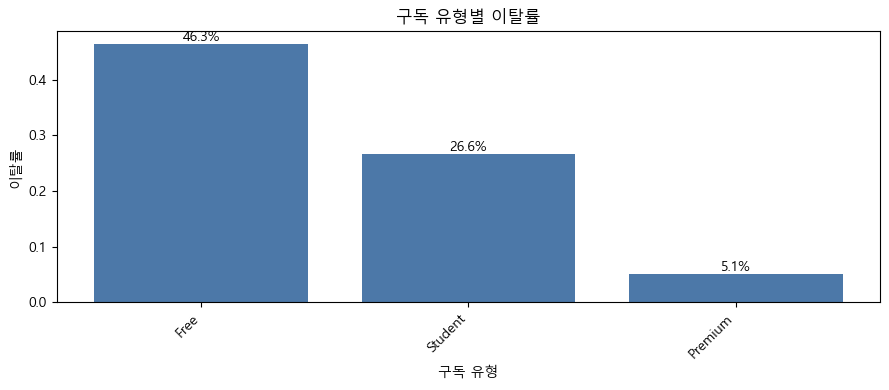

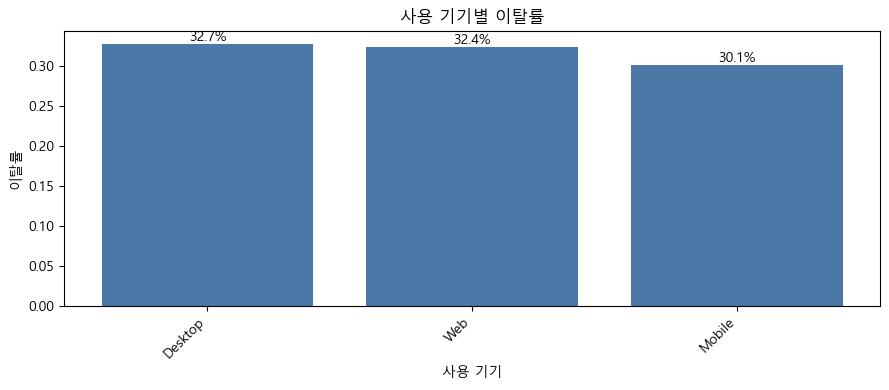

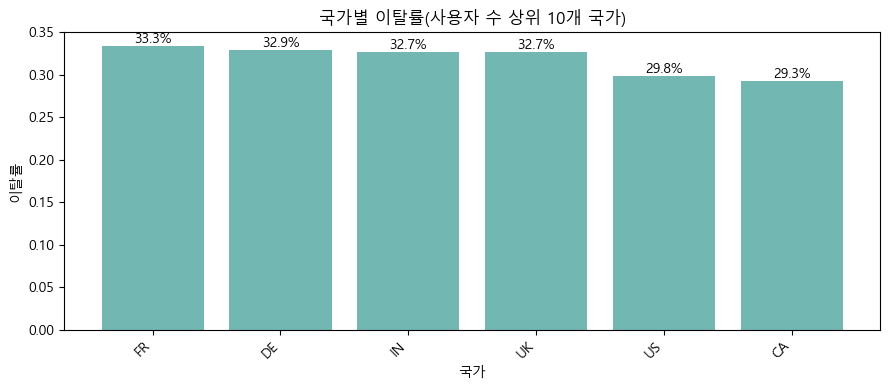

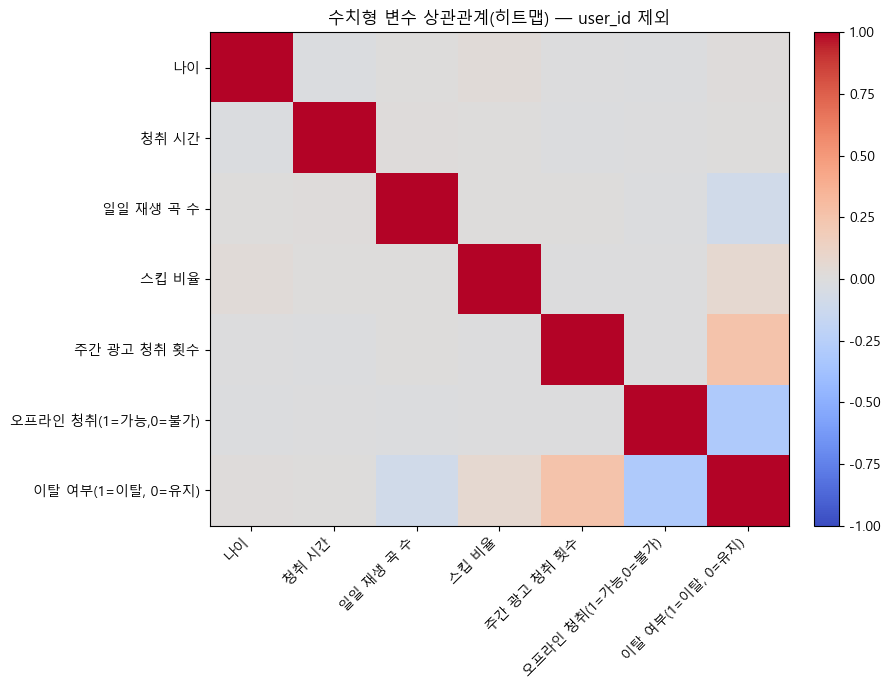

C:\Users\Playdata\AppData\Local\Temp\ipykernel_15400\2985531374.py:174: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot([ads_off0, ads_off1], labels=["오프라인 불가(0)", "오프라인 가능(1)"], patch_artist=True)


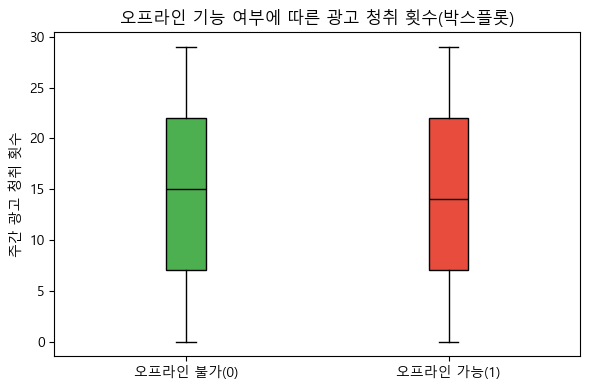

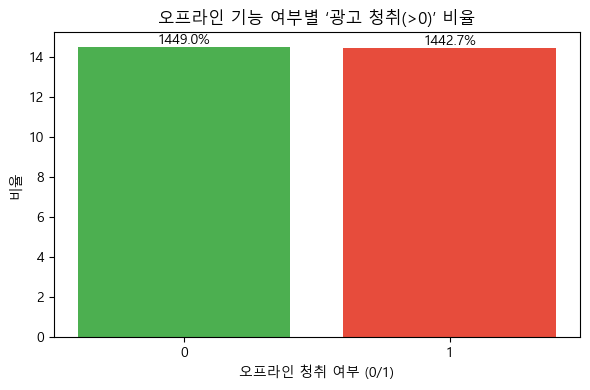

In [10]:
# =========================
# 0) 데이터 로드
# =========================
df = pd.read_csv("data/spotify_churn_dataset copy.csv")  # 경로/파일명 맞게 수정 가능

# =========================
# 1) 컬럼/라벨(한글) 매핑
# =========================
TARGET_COL = "is_churned"      # 타깃
ID_COL = "user_id"             # 식별자(상관관계에서 제외)

# (원본 컬럼명이 유지되는 경우) 한글 라벨
KR = {
    "is_churned": "이탈 여부(1=이탈, 0=유지)",
    "age": "나이",
    "gender": "성별",
    "country": "국가",
    "subscription_type": "구독 유형",
    "device_type": "사용 기기",
    "listening_time": "청취 시간",
    "songs_played_per_day": "일일 재생 곡 수",
    "skip_rate": "스킵 비율",
    "ads_listened_per_week": "주간 광고 청취 횟수",
    "offline_listening": "오프라인 청취(1=가능,0=불가)",
    "user_id": "사용자 ID",
}

def kr_label(col):
    return KR.get(col, col)

# =========================
# 2) 공통 스타일/색상
# =========================
COLOR_0 = "#4CAF50"  # 유지(0)
COLOR_1 = "#E74C3C"  # 이탈(1)
COLOR_BAR = "#4C78A8"
COLOR_HIST = "#72B7B2"
HEATMAP_CMAP = "coolwarm"

def add_pct_labels(bars, values_ratio, fmt="{:.1f}%"):
    """막대 위 퍼센트 라벨 (values_ratio: 0~1)"""
    for bar, v in zip(bars, values_ratio):
        h = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            h,
            fmt.format(v * 100),
            ha="center",
            va="bottom",
            fontsize=10
        )

def plot_rate_bar(series, title, xlabel, bar_color=COLOR_BAR):
    """카테고리별 이탈률 바차트 + 퍼센트 라벨"""
    plt.figure(figsize=(9, 4))
    bars = plt.bar(series.index.astype(str), series.values, color=bar_color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("이탈률")
    add_pct_labels(bars, series.values)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# =========================
# 3) 타깃 분포 바차트(불균형 확인)
# =========================
target_counts = df[TARGET_COL].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(
    target_counts.index.astype(str),
    target_counts.values,
    color=[COLOR_0, COLOR_1]
)
plt.title("타깃 분포(이탈/유지) — 클래스 불균형 확인")
plt.xlabel("이탈 여부 (0=유지, 1=이탈)")
plt.ylabel("사용자 수")
plt.tight_layout()
plt.show()

# =========================
# 4) 수치형 분포 히스토그램
# =========================
# 전처리로 컬럼명이 달라졌을 수도 있으니 존재하는 것만 골라서 그림
hist_candidates = ["listening_time", "songs_played_per_day", "skip_rate", "age"]
hist_cols = [c for c in hist_candidates if c in df.columns]

for col in hist_cols:
    plt.figure(figsize=(7, 4))
    plt.hist(df[col].values, bins=30, color=COLOR_HIST, edgecolor="white", alpha=0.9)
    plt.title(f"{kr_label(col)} 분포(히스토그램)")
    plt.xlabel(kr_label(col))
    plt.ylabel("빈도(개수)")
    plt.tight_layout()
    plt.show()

# =========================
# 5) 이탈/비이탈 박스플롯
# =========================
box_candidates = ["skip_rate", "listening_time"]
box_cols = [c for c in box_candidates if c in df.columns]

for col in box_cols:
    data0 = df.loc[df[TARGET_COL] == 0, col].values
    data1 = df.loc[df[TARGET_COL] == 1, col].values

    plt.figure(figsize=(6, 4))
    bp = plt.boxplot([data0, data1], labels=["유지(0)", "이탈(1)"], patch_artist=True)

    bp["boxes"][0].set_facecolor(COLOR_0)
    bp["boxes"][1].set_facecolor(COLOR_1)
    for median in bp["medians"]:
        median.set_color("black")

    plt.title(f"{kr_label(col)} — 이탈/유지 비교(박스플롯)")
    plt.ylabel(kr_label(col))
    plt.tight_layout()
    plt.show()

# =========================
# 6) 카테고리별 이탈률 바차트
#   - country는 상위 10개만(사용자 수 기준)
#   - 전처리로 범주형이 원핫되었으면 skip
# =========================
cat_cols = ["subscription_type", "device_type", "country"]
cat_cols = [c for c in cat_cols if c in df.columns and df[c].dtype == "object"]

# subscription_type / device_type
for col in ["subscription_type", "device_type"]:
    if col in cat_cols:
        rate = df.groupby(col)[TARGET_COL].mean().sort_values(ascending=False)
        plot_rate_bar(rate, f"{kr_label(col)}별 이탈률", kr_label(col), bar_color="#4C78A8")

# country Top 10
if "country" in cat_cols:
    top_countries = df["country"].value_counts().head(10).index
    country_rate_top10 = (
        df[df["country"].isin(top_countries)]
        .groupby("country")[TARGET_COL]
        .mean()
        .sort_values(ascending=False)
    )
    plot_rate_bar(country_rate_top10, "국가별 이탈률(사용자 수 상위 10개 국가)", "국가", bar_color="#72B7B2")

# =========================
# 7) 수치형 상관관계 히트맵
#   - user_id 자동 제외
# =========================
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != ID_COL]  # user_id 제외
# (타깃 포함해서 상관관계 보고 싶으면 그대로 둠)

corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(9, 7))
im = plt.imshow(corr.values, aspect="auto", cmap=HEATMAP_CMAP, vmin=-1, vmax=1)
plt.xticks(range(len(corr.columns)), [kr_label(c) for c in corr.columns], rotation=45, ha="right")
plt.yticks(range(len(corr.index)), [kr_label(c) for c in corr.index])
plt.title("수치형 변수 상관관계(히트맵) — user_id 제외")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

# =========================
# 8) (특히) ads_listened_per_week vs offline_listening 관계 시각화
# =========================
if {"ads_listened_per_week", "offline_listening"}.issubset(df.columns):
    # 오프라인 여부별 광고 청취 분포(박스플롯)
    ads_off0 = df.loc[df["offline_listening"] == 0, "ads_listened_per_week"].values
    ads_off1 = df.loc[df["offline_listening"] == 1, "ads_listened_per_week"].values

    plt.figure(figsize=(6, 4))
    bp = plt.boxplot([ads_off0, ads_off1], labels=["오프라인 불가(0)", "오프라인 가능(1)"], patch_artist=True)
    bp["boxes"][0].set_facecolor(COLOR_0)
    bp["boxes"][1].set_facecolor(COLOR_1)
    for median in bp["medians"]:
        median.set_color("black")

    plt.title("오프라인 기능 여부에 따른 광고 청취 횟수(박스플롯)")
    plt.ylabel(kr_label("ads_listened_per_week"))
    plt.tight_layout()
    plt.show()

    # 오프라인 여부별 (광고 청취 > 0) 비율 바차트 + 퍼센트 라벨
    ads_gt0 = (df["ads_listened_per_week"] > 0).astype(int)
    ratio = df.groupby("offline_listening")[ads_gt0.name].mean().sort_index()

    plt.figure(figsize=(6, 4))
    bars = plt.bar(ratio.index.astype(str), ratio.values, color=[COLOR_0, COLOR_1])
    plt.title("오프라인 기능 여부별 ‘광고 청취(>0)’ 비율")
    plt.xlabel("오프라인 청취 여부 (0/1)")
    plt.ylabel("비율")
    add_pct_labels(bars, ratio.values)
    plt.tight_layout()
    plt.show()


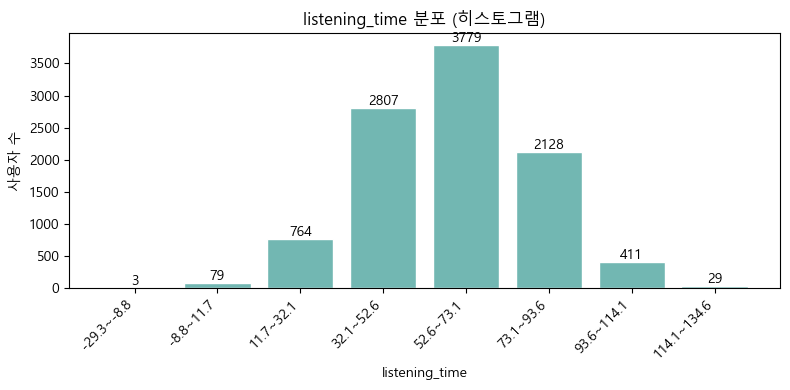

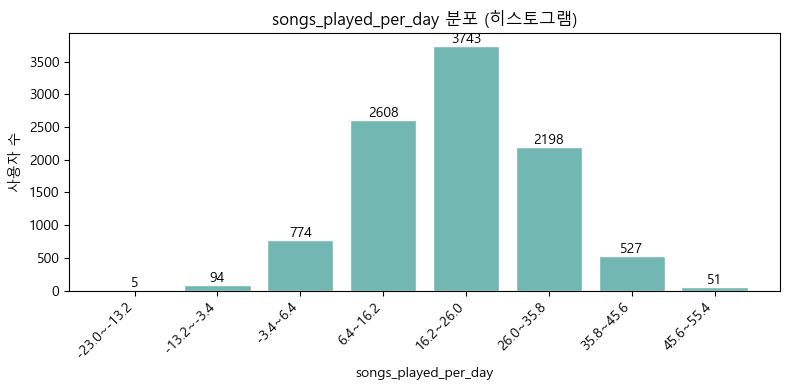

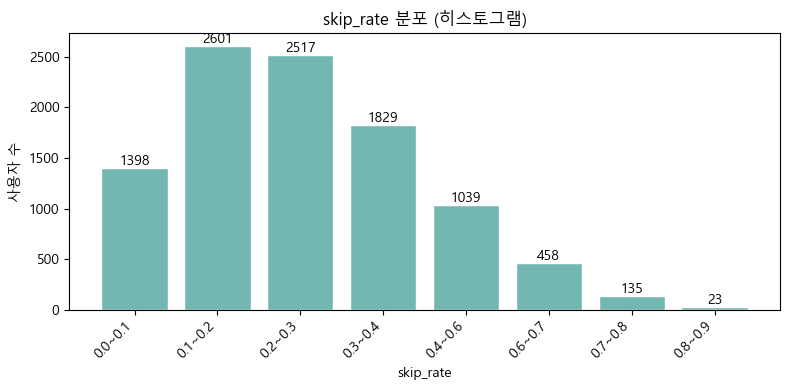

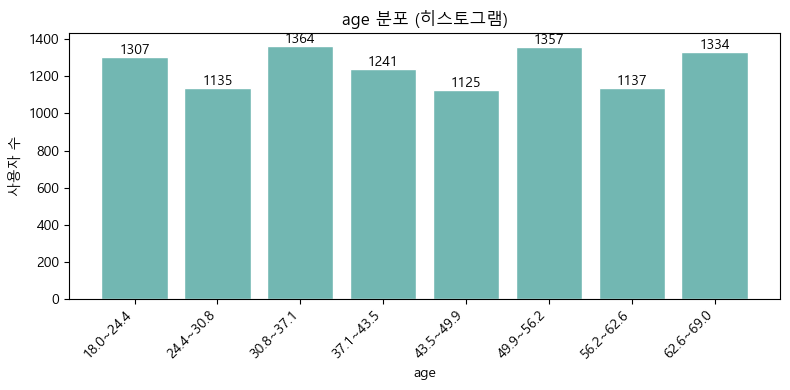

In [18]:
def histogram_with_labels(data, bins, title, xlabel):
    """
    히스토그램 + 각 bin의 구간 + 빈도 수 표시
    """
    counts, bin_edges = np.histogram(data, bins=bins)

    plt.figure(figsize=(8, 4))
    bars = plt.bar(
        range(len(counts)),
        counts,
        color="#72B7B2",
        edgecolor="white"
    )

    # x축: 구간 라벨
    bin_labels = [
        f"{bin_edges[i]:.1f}~{bin_edges[i+1]:.1f}"
        for i in range(len(bin_edges) - 1)
    ]
    plt.xticks(range(len(counts)), bin_labels, rotation=45, ha="right")

    # bar 위에 숫자 표시
    for bar, cnt in zip(bars, counts):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{cnt}",
            ha="center",
            va="bottom",
            fontsize=10
        )

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("사용자 수")
    plt.tight_layout()
    plt.show()


df = pd.read_csv("data/spotify_churn_dataset copy.csv")

# 시각화할 수치형 컬럼
num_cols = [
    "listening_time",
    "songs_played_per_day",
    "skip_rate",
    "age"
]

# 실제 존재하는 컬럼만
num_cols = [c for c in num_cols if c in df.columns]

for col in num_cols:
    histogram_with_labels(
        data=df[col].values,
        bins=8,   # 보고서용으로 너무 많지 않게
        title=f"{col} 분포 (히스토그램)",
        xlabel=col
    )

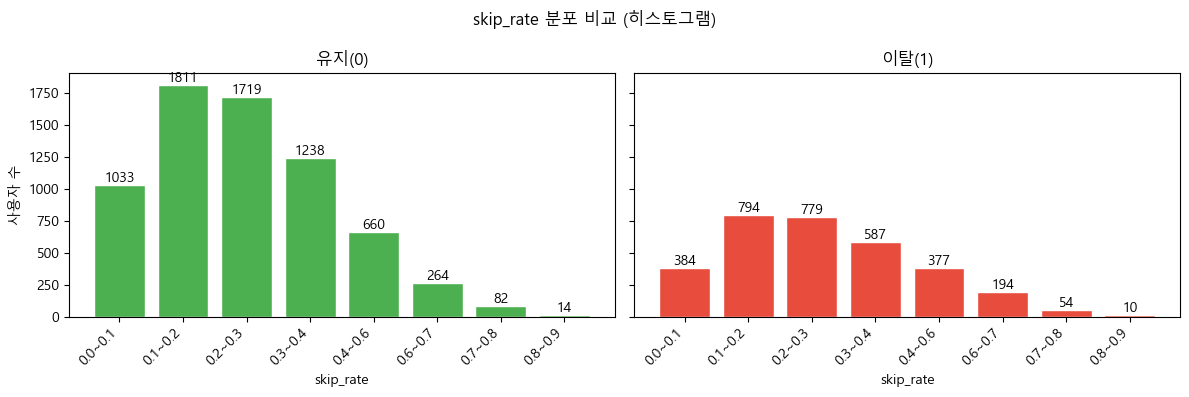

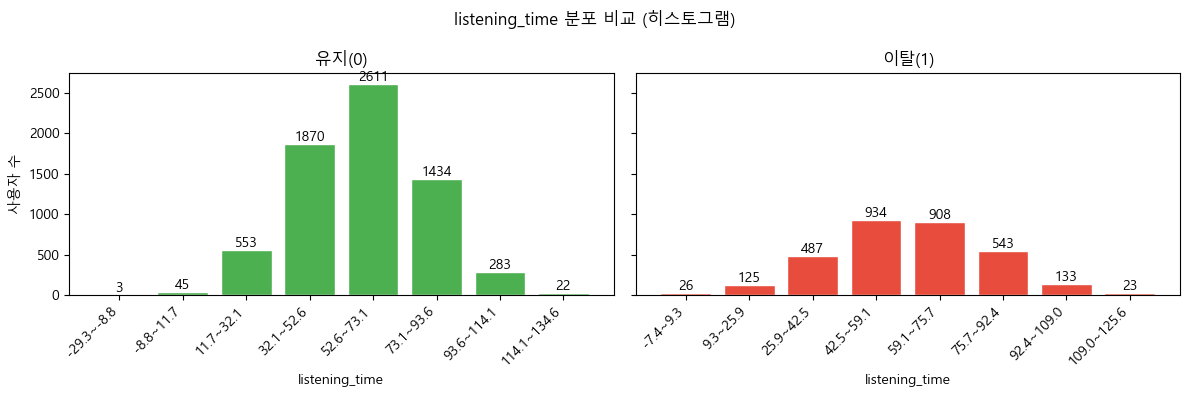

In [15]:
TARGET = "is_churned"

for col in ["skip_rate", "listening_time"]:
    if col not in df.columns:
        continue

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    for ax, churn_val, color, label in zip(
        axes,
        [0, 1],
        ["#4CAF50", "#E74C3C"],
        ["유지(0)", "이탈(1)"]
    ):
        counts, bins = np.histogram(
            df[df[TARGET] == churn_val][col],
            bins=8
        )

        ax.bar(range(len(counts)), counts, color=color, edgecolor="white")

        bin_labels = [
            f"{bins[i]:.1f}~{bins[i+1]:.1f}"
            for i in range(len(bins) - 1)
        ]
        ax.set_xticks(range(len(counts)))
        ax.set_xticklabels(bin_labels, rotation=45, ha="right")

        for i, cnt in enumerate(counts):
            ax.text(i, cnt, f"{cnt}", ha="center", va="bottom")

        ax.set_title(f"{label}")
        ax.set_xlabel(col)

    axes[0].set_ylabel("사용자 수")
    fig.suptitle(f"{col} 분포 비교 (히스토그램)")
    plt.tight_layout()
    plt.show()


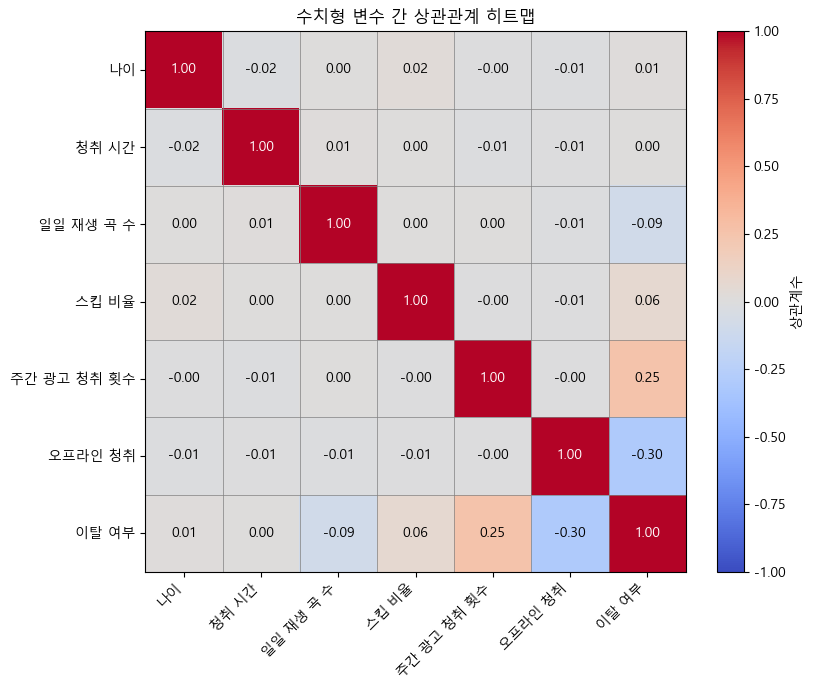

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 한글 폰트 설정 (Windows)
# =========================
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# =========================
# 데이터 로드
# =========================
df = pd.read_csv("data/spotify_churn_dataset copy.csv")

# =========================
# 한글 라벨 매핑
# =========================
KR = {
    "age": "나이",
    "listening_time": "청취 시간",
    "songs_played_per_day": "일일 재생 곡 수",
    "skip_rate": "스킵 비율",
    "ads_listened_per_week": "주간 광고 청취 횟수",
    "offline_listening": "오프라인 청취",
    "is_churned": "이탈 여부"
}

# =========================
# 수치형 컬럼 선택 (user_id 제외)
# =========================
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != "user_id"]

corr = df[num_cols].corr(numeric_only=True)

# =========================
# 히트맵 시각화
# =========================
fig, ax = plt.subplots(figsize=(9, 7))

im = ax.imshow(
    corr.values,
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)

# 컬러바
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("상관계수")

# 축 라벨 (한글)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels([KR.get(c, c) for c in corr.columns], rotation=45, ha="right")
ax.set_yticklabels([KR.get(c, c) for c in corr.index])

# =========================
# ✅ 그리드 추가
# =========================
ax.set_xticks(np.arange(-.5, len(corr.columns), 1), minor=True)
ax.set_yticks(np.arange(-.5, len(corr.index), 1), minor=True)
ax.grid(which="minor", color="gray", linestyle="-", linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

# =========================
# ✅ 셀 안에 상관계수 수치 표시
# =========================
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        value = corr.iloc[i, j]
        ax.text(
            j, i,
            f"{value:.2f}",
            ha="center",
            va="center",
            color="black" if abs(value) < 0.6 else "white",
            fontsize=10
        )

# 제목
ax.set_title("수치형 변수 간 상관관계 히트맵")

plt.tight_layout()
plt.show()
